# Wine Classification

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("..\\datasets\\winequality-red.csv", sep=';')
#df.head()
#df.dtypes

df['goodquality'] = [1 if x>=6 else 0 for x in df['quality'] ]
x = df.drop(['quality','goodquality'],axis = 1)
y = df['goodquality']


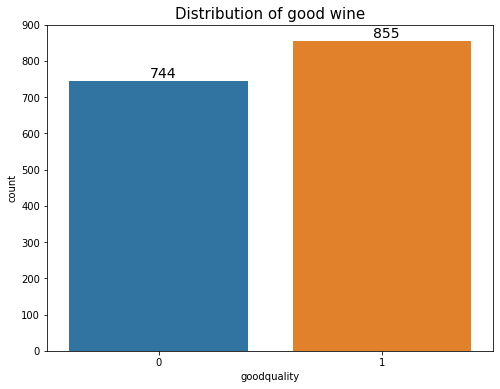

In [2]:

# Normalize feature variables
x_features = x
x = StandardScaler().fit_transform(x)
df['goodquality'].value_counts()

plt.figure(figsize=(8,6))
plt.title('Distribution of good wine',size=15)
sns.countplot(x=df['goodquality'])
target_count = df.goodquality.value_counts()
plt.annotate(text=target_count[0], xy=( -0.04,10+target_count[0]),size=14)
plt.annotate(text=target_count[1], xy=(  0.96,10+target_count[1]),size=14)
plt.ylim(0,900)
plt.show()


In [3]:

print(df.corr())

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
scaler = StandardScaler().fit(x_train)
print(scaler)

x_scaled = scaler.transform(x_train)
print(x_scaled)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   
goodquality                0.095093         -0.321441     0.159129   

                   

In [4]:
from sklearn.neighbors import KNeighborsClassifier
best_acc = 0
for k in range(1,70):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_score = knn.score(x_train,y_train)
    if train_score > best_acc:
        best_acc = train_score
        best_k= k
    print("Accuracy at ",k," is ",100*knn.score(x_train,y_train))
print("Best accuracy: ",best_k)


Accuracy at  1  is  100.0
Accuracy at  2  is  87.65638031693076
Accuracy at  3  is  86.07172643869892
Accuracy at  4  is  82.98582151793161
Accuracy at  5  is  82.40200166805671
Accuracy at  6  is  80.98415346121767
Accuracy at  7  is  79.81651376146789
Accuracy at  8  is  79.8999165971643
Accuracy at  9  is  79.06588824020017
Accuracy at  10  is  78.73227689741451
Accuracy at  11  is  78.31526271893244
Accuracy at  12  is  77.73144286905755
Accuracy at  13  is  77.31442869057548
Accuracy at  14  is  78.14845704753962
Accuracy at  15  is  77.73144286905755
Accuracy at  16  is  78.23185988323603
Accuracy at  17  is  76.56380316930776
Accuracy at  18  is  77.56463719766472
Accuracy at  19  is  75.89658048373644
Accuracy at  20  is  76.64720600500416
Accuracy at  21  is  75.97998331943286
Accuracy at  22  is  76.39699749791492
Accuracy at  23  is  75.5629691409508
Accuracy at  24  is  76.56380316930776
Accuracy at  25  is  76.06338615512928
Accuracy at  26  is  76.48040033361134
Accuracy 

In [5]:
knn = KNeighborsClassifier(n_neighbors=75)
knn.fit(x_train,y_train)
train_score_knn = knn.score(x_train,y_train)

print("accuracy: ",round(100*train_score_knn,2),"%")

accuracy:  74.4 %


[0.684375   0.690625   0.7125     0.721875   0.65830721]


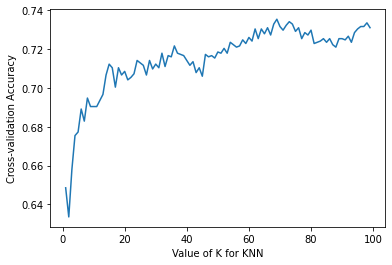

In [6]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
print(scores)

k_scores =[]
for k_number in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(range(1,100),k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validation Accuracy')
plt.show()

In [8]:
knn.fit(x_train,y_train)
y_pred = np.array(knn.predict(x_test))

from sklearn.metrics import confusion_matrix

conf_mat = pd.DataFrame(confusion_matrix(y_test,y_pred)
            ,columns=["Pred Negative","Pred Positive"]
            ,index=["True Negative","true Positive"])
print(conf_mat)

               Pred Negative  Pred Positive
True Negative            124             61
true Positive             43            172


In [11]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
accuracy = round((tn+tp)/(tn+tp+fn+fp),3)
print("Accuracy :",accuracy)

precision = round((tp)/(tp+fp),3)
print("Precision:",precision)

recall = round((tp)/(tp+fn),4)
print("recall   :",recall)

f1 = round(2*(precision*recall) / (precision+recall), 3)
print("F1 score :",f1)



Accuracy : 0.74
Precision: 0.738
recall   : 0.8
F1 score : 0.768
